#### Analysis of multiple stocks - for simulation over the course of 2 years (bi-weekly buy in)

Goal: This script simulates 2 years of bi-weekly prediction/closing_cost determinations and simulates for a series of chosen stocks if it is better to invest a consistent price or buy in higher/lower depending on the current performance of the stock.

Take any number of stocks and run a trendline through multiple 1 year cycles, creating a linear prediction to be applied bi-weekly. Assess the theoretical performance of adjusting bi-weekly contributions as compared to contributing a consistent amount every other week.


In [51]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

In [52]:
# Arguments     Scenarios                                                                             Example value

# period        date period to download                                     1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# interval      data interval. If it’s intraday data, the interval needs to be set within 60 days 1m, 1h, 1d, 1wk, 1mo
# start         If period is not set- Download start date string (YYYY-MM-DD) or datetime             2020-03-18
# end           If period is not set - Download end date string (YYYY-MM-DD) or datetime              2020-03-19
# prepost       Boolean value to include Pre and Post market data                                     Default is False
# auto_adjust   Boolean value to adjust all OHLC                                                      Default is True
# actions       Boolean value download stock dividends and stock splits events                        Default is True

In [53]:
# choose stocks of interest
# stocks chosen must all have data for full range of dates
lista = ['AAPL', 'AMD', 'AMZN', 'CRM', 'GOOG', 'INTC', 'MDB', 'MSFT', 'NVDA', 'QQQ', 'SBUX', 'SQ', 'TSLA', 'TSM']

# choose how much to contribute each bi-weekly period
biwkly_contrib = 10 

# max amount to contribute per stock over the course of 2 years
# should be at least 50 times the bi-weekly contrib
invest = biwkly_contrib*50

# number of days to roll into each linear regression. 260 will be about 1 year
roll_days = 90

In [54]:
# Pull the closing data

data = yf.download(
        tickers = lista
        ,period = '3y'
        #,start = '2015-03-31' # to choose custom date ranges
        #,end = '2019-01-01' # to choose custom date ranges
    )

df = data['Close']
df = df.dropna() # in case the first row generates as nulls
df['Index'] = np.arange(1,len(df)+1) # add an index
df

[*********************100%***********************]  14 of 14 completed


,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM,Index
Date,,,,,,,,,,,,,,,
2018-12-10,42.400002,19.990000,1641.030029,137.270004,1039.550049,47.209999,83.050003,107.589996,37.965000,163.070007,65.489998,63.380001,73.029999,36.430000,1
2018-12-11,42.157501,19.980000,1643.239990,136.789993,1051.750000,47.380001,85.150002,108.589996,37.047501,163.610001,65.919998,61.779999,73.351997,36.700001,2
2018-12-12,42.275002,20.480000,1663.540039,140.089996,1063.680054,47.830002,89.059998,109.080002,37.224998,165.050003,66.129997,63.650002,73.320000,37.380001,3
2018-12-13,42.737499,19.860001,1658.380005,141.139999,1061.900024,48.290001,89.559998,109.449997,37.222500,165.100006,66.910004,62.900002,75.358002,37.330002,4
2018-12-14,41.369999,19.900000,1591.910034,137.039993,1042.099976,47.860001,90.580002,106.029999,36.612499,161.080002,65.339996,62.139999,73.141998,36.529999,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,164.770004,149.110001,3443.719971,251.500000,2832.360107,48.599998,456.890015,330.079987,314.350006,387.119995,108.660004,194.500000,1095.000000,120.629997,751
2021-12-02,163.759995,150.679993,3437.360107,261.200012,2875.530029,49.500000,481.589996,329.489990,321.260010,389.910004,111.419998,192.149994,1084.599976,121.699997,752
2021-12-03,161.839996,144.009995,3389.790039,258.320007,2850.409912,49.250000,450.160004,323.010010,306.929993,383.130005,111.239998,181.309998,1014.969971,119.330002,753


In [55]:
### in progress
# setting a rolling 260 days for each observed stock

df2 = df

for j in lista:
    df2[str(j) + ' roll'] = df2[str(j)].rolling(roll_days).mean()

df2
#df2.to_csv(r'/Volumes/GoogleDrive/My Drive/Python/other_projects/roll_test.csv', index = False)

,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,...,GOOG roll,INTC roll,MDB roll,MSFT roll,NVDA roll,QQQ roll,SBUX roll,SQ roll,TSLA roll,TSM roll
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-10,42.400002,19.990000,1641.030029,137.270004,1039.550049,47.209999,83.050003,107.589996,37.965000,163.070007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-11,42.157501,19.980000,1643.239990,136.789993,1051.750000,47.380001,85.150002,108.589996,37.047501,163.610001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-12,42.275002,20.480000,1663.540039,140.089996,1063.680054,47.830002,89.059998,109.080002,37.224998,165.050003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-13,42.737499,19.860001,1658.380005,141.139999,1061.900024,48.290001,89.559998,109.449997,37.222500,165.100006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-14,41.369999,19.900000,1591.910034,137.039993,1042.099976,47.860001,90.580002,106.029999,36.612499,161.080002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,164.770004,149.110001,3443.719971,251.500000,2832.360107,48.599998,456.890015,330.079987,314.350006,387.119995,...,2839.251226,52.519222,465.275944,306.791110,236.457889,376.426889,114.472445,249.916778,856.432220,116.478889
2021-12-02,163.759995,150.679993,3437.360107,261.200012,2875.530029,49.500000,481.589996,329.489990,321.260010,389.910004,...,2840.802338,52.478333,466.621500,307.268332,237.893223,376.710001,114.310111,249.254778,861.319109,116.569555
2021-12-03,161.839996,144.009995,3389.790039,258.320007,2850.409912,49.250000,450.160004,323.010010,306.929993,383.130005,...,2842.166561,52.435889,467.581167,307.677110,239.136556,376.902223,114.186000,248.395889,865.407886,116.616889


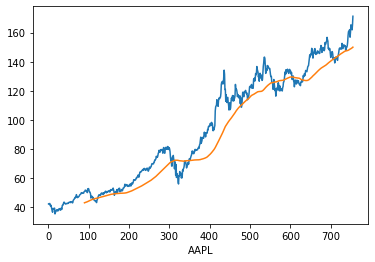

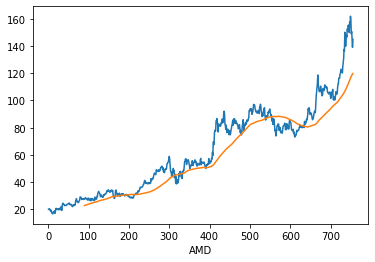

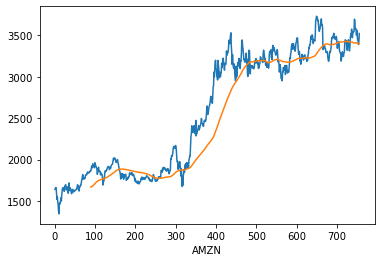

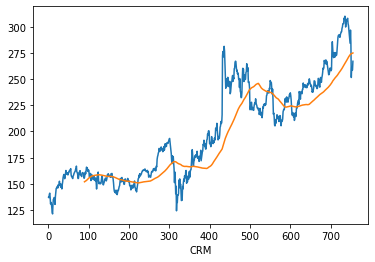

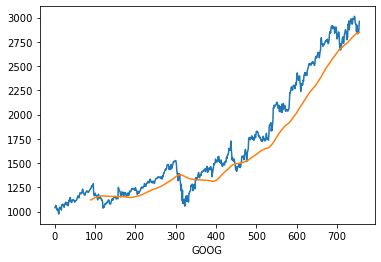

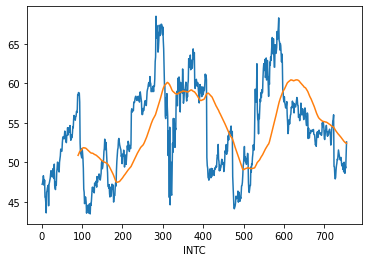

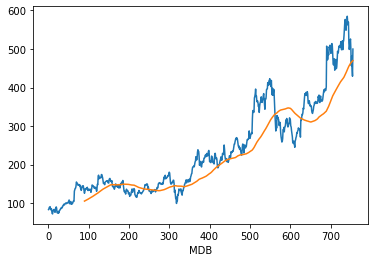

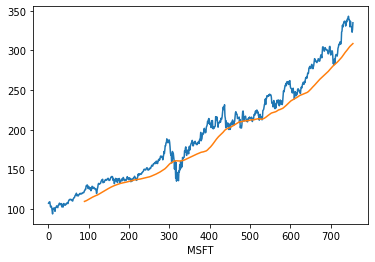

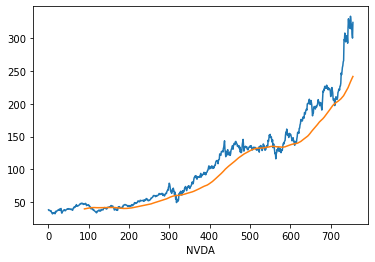

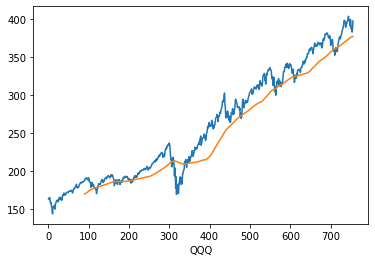

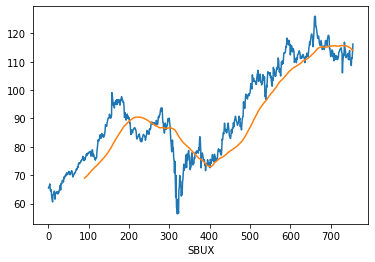

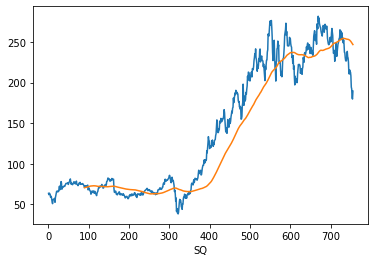

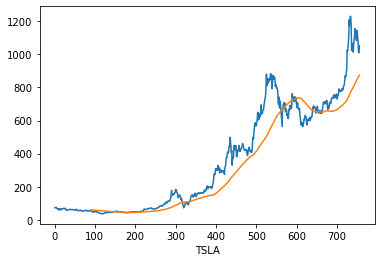

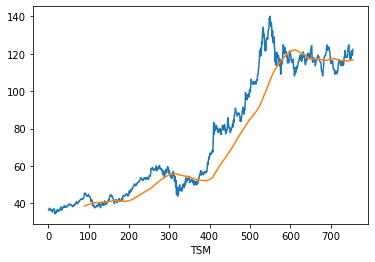

In [56]:
### in progress
# Not what I thought. I thought it would match the rolling linear predictions.
# This is a single point representing 260 days while the linear predition is a line representing 260 days
# I would have to do something weird like set a multiplier based on the gains/losses made in the last year
# but that sounds too iffy and made up

for j in lista:
    x = df2['Index']
    y = df2[str(j)]
    plt.plot(x, y)

    x = df2['Index']
    y = df2[str(j) + ' roll']
    plt.plot(x, y)

    plt.xlabel(j)
    plt.show()

In [57]:
#df3['Dates'] = df3.index
#df3

In [58]:
### in progress
# now that I know I don't want a rolling average, find out how to more simply do a rolling linear regression
# goal is to avoid having to make 50 dataframes

# https://www.statsmodels.org/dev/examples/notebooks/generated/rolling_ls.html
# https://www.statsmodels.org/dev/generated/statsmodels.regression.rolling.RollingOLS.html

# issue - I need every iteration to have a fresh 1-260 as opposed to 1-260, then 2-261, etc
    # I can't seem to read from a stagnant list to do this

#mod = RollingOLS.from_formula("TSM ~ Index", data=df3, window=roll_days)
#rres = mod.fit()
#df3 = rres.params
#df3['TSM'] = df['TSM']
#df3['Pred'] = df3['Intercept']+(df3['Index']*roll_days)
#df3

#df3.to_csv(r'/Volumes/GoogleDrive/My Drive/Python/other_projects/roll_test.csv', index = False)

In [59]:
# function to make a useful time structure as independent variable
def myTime(date_time_str):
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
    return(time.mktime(date_time_obj.timetuple()))

In [60]:
#df3['Time'] = [myTime(obs) for obs in df3['Dates']]

In [61]:
# create 50 dataframes in a dictionary, each 260 days: dataframes['data0'] - dataframes['data49']
# 0 is the most recent 260 days, 49 is the oldest
# 260 days isn't exactly 1 trading year, but I think it's close enough

dataframes = {}

for j in lista:
    x = (max(df['Index']))-roll_days ### is this correct?
    y = max(df['Index'])

    for i in range(50):
        dataframes['data' + str(i)] = df.iloc[x:y]
        x -= 10
        y -= 10

print(dataframes['data0'])
print(dataframes['data49'])

                  AAPL         AMD         AMZN         CRM         GOOG  \
Date                                                                       
2021-08-02  145.520004  108.629997  3331.479980  240.860001  2719.790039   
2021-08-03  147.360001  112.559998  3366.239990  241.130005  2725.600098   
2021-08-04  146.949997  118.769997  3354.719971  244.169998  2720.570068   
2021-08-05  147.059998  112.349998  3375.989990  250.559998  2738.800049   
2021-08-06  146.139999  110.110001  3344.939941  250.589996  2740.719971   
...                ...         ...          ...         ...          ...   
2021-12-01  164.770004  149.110001  3443.719971  251.500000  2832.360107   
2021-12-02  163.759995  150.679993  3437.360107  261.200012  2875.530029   
2021-12-03  161.839996  144.009995  3389.790039  258.320007  2850.409912   
2021-12-06  165.320007  139.059998  3427.370117  258.750000  2875.929932   
2021-12-07  171.179993  144.850006  3523.290039  266.989990  2960.729980   

           

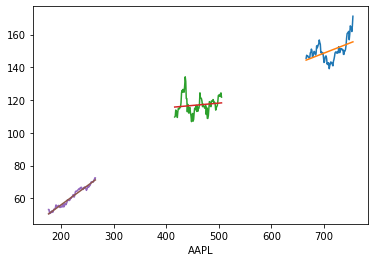

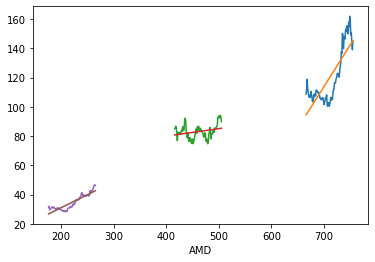

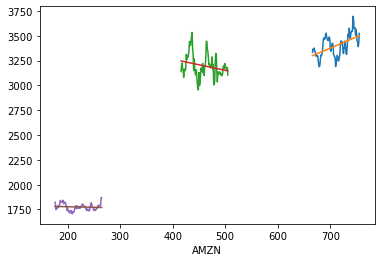

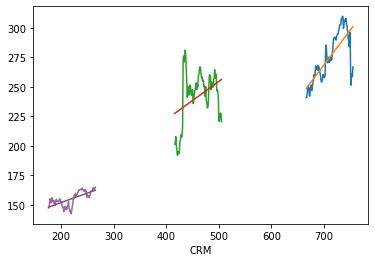

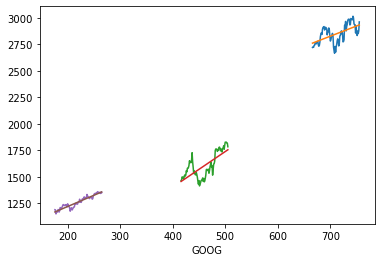

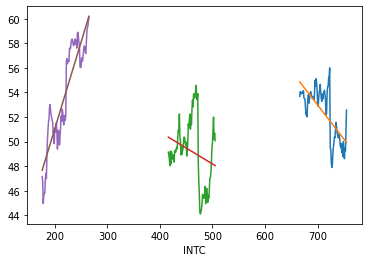

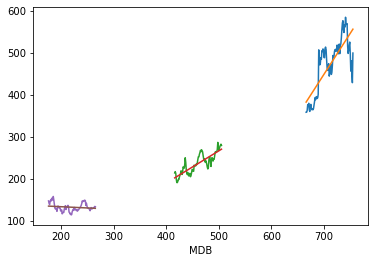

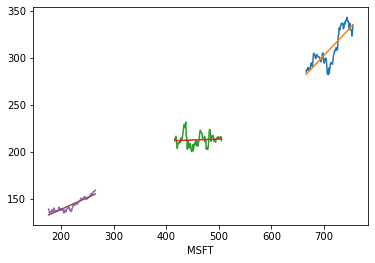

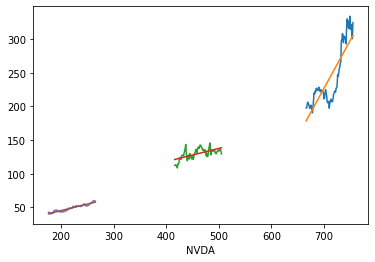

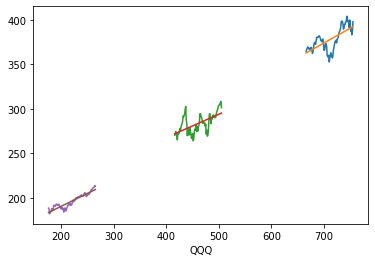

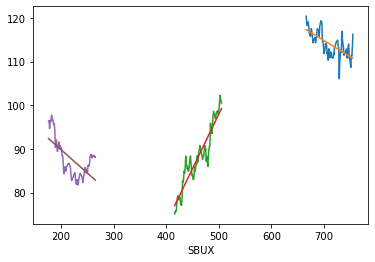

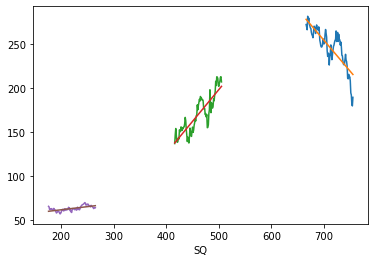

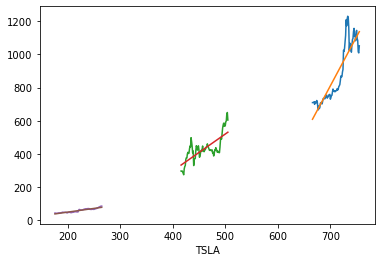

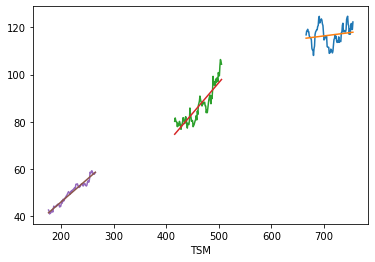

In [62]:
# plot 3 1-year segments of data with their associated trendlines

for i in lista:
    # plot data with a trendline - most recent 260 days
    x = dataframes['data0']['Index']
    y = dataframes['data0'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    # plot data with a trendline - the middle 260 days
    x = dataframes['data25']['Index']
    y = dataframes['data25'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    # plot data with a trendline - the oldest 260 days
    x = dataframes['data49']['Index']
    y = dataframes['data49'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    plt.xlabel(i)
    plt.show()

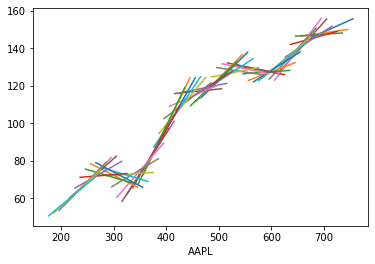

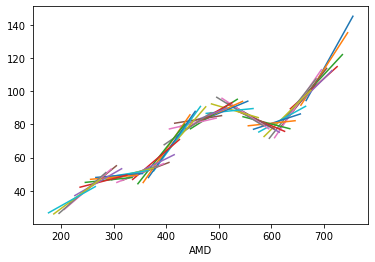

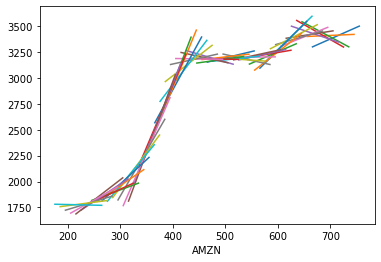

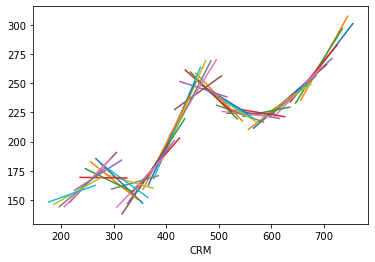

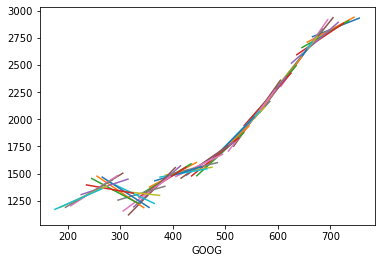

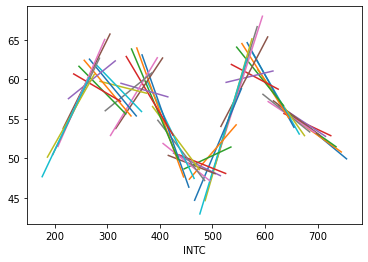

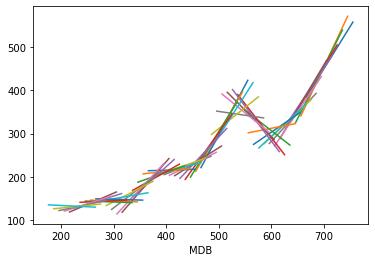

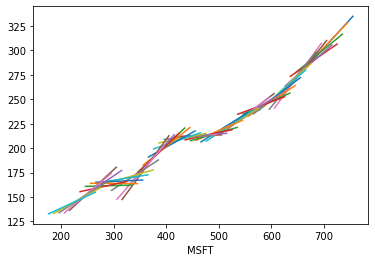

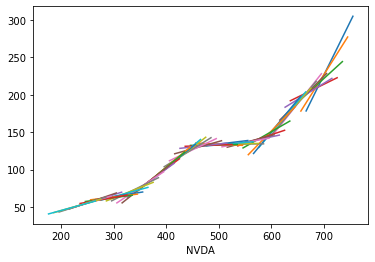

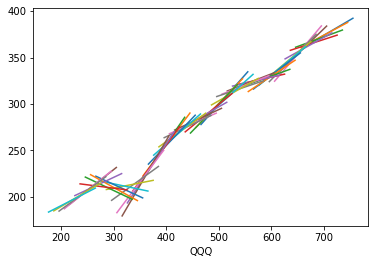

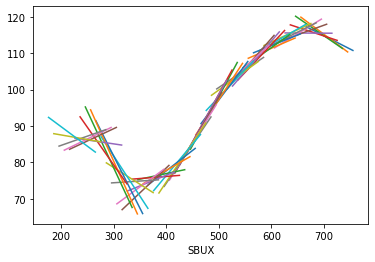

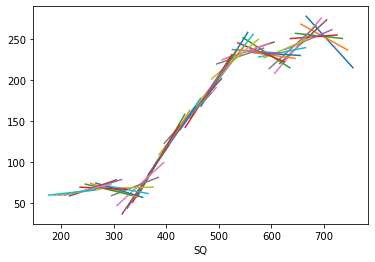

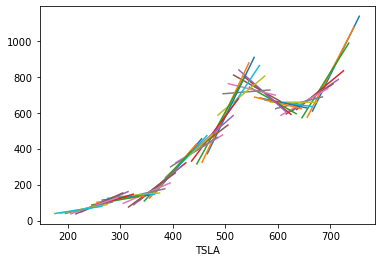

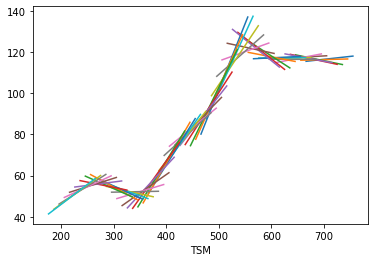

In [63]:
# plot only trendlines, bi-weekly, each line representing 1 year of data
# if the movement is too stable, these graphs won't be useable

for j in lista:
    for i in range(len(dataframes)):
        x = dataframes['data' + str(i)]['Index']
        y = dataframes['data' + str(i)][str(j)]

        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b)

    plt.xlabel(j)
    plt.show()

In [64]:
# create pred and pred/close list for each of the 50 dataframes
# may take 30+ seconds to run

k = len(dataframes)

for j in lista:
    for e in range(k):
        nlist = []
        ylist = []
        y = dataframes['data' + str(e)][str(j)]

        for i in range(1,len(dataframes['data0'])+1): # create pred
            x = range(roll_days)
            m, b = np.polyfit(x, y, 1)
            d = m*i+b
            nlist.append(d)

        dataframes['data' + str(e)][str(j) + ' pred'] = nlist

        for i in range(1,len(dataframes['data0'])+1): # create pred/close
            d = (dataframes['data' + str(e)][str(j) + ' pred'].iloc[i-1])/(dataframes['data' + str(e)][str(j)].iloc[i-1])
            ylist.append(d)

        dataframes['data' + str(e)][str(j) + ' pred/close'] = ylist

dataframes['data0']

<ipython-input-64-6f7aa18876ec>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes['data' + str(e)][str(j) + ' pred'] = nlist
<ipython-input-64-6f7aa18876ec>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes['data' + str(e)][str(j) + ' pred/close'] = ylist


,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,...,QQQ pred,QQQ pred/close,SBUX pred,SBUX pred/close,SQ pred,SQ pred/close,TSLA pred,TSLA pred/close,TSM pred,TSM pred/close
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-02,145.520004,108.629997,3331.479980,240.860001,2719.790039,53.680000,358.989990,284.820007,197.500000,364.600006,...,363.053759,0.995759,117.221774,0.973845,277.609014,1.019197,615.218465,0.866908,115.479356,0.988185
2021-08-03,147.360001,112.559998,3366.239990,241.130005,2725.600098,54.060001,359.170013,287.119995,198.149994,366.809998,...,363.385647,0.990665,117.148362,0.983366,276.903396,1.027509,621.147777,0.875177,115.507721,0.975490
2021-08-04,146.949997,118.769997,3354.719971,244.169998,2720.570068,53.900002,363.179993,286.510010,202.740005,367.339996,...,363.717535,0.990139,117.074950,0.990063,276.197779,1.036701,627.077090,0.882064,115.536085,0.973017
2021-08-05,147.059998,112.349998,3375.989990,250.559998,2738.800049,53.889999,376.720001,289.519989,206.369995,369.670013,...,364.049423,0.984796,117.001537,0.982958,275.492162,0.977581,633.006402,0.885782,115.564450,0.969338
2021-08-06,146.139999,110.110001,3344.939941,250.589996,2740.719971,53.919998,373.450012,289.459991,203.660004,368.049988,...,364.381311,0.990032,116.928125,0.982177,274.786545,0.998861,638.935714,0.913940,115.592815,0.977860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,164.770004,149.110001,3443.719971,251.500000,2832.360107,48.599998,456.890015,330.079987,314.350006,387.119995,...,391.264244,1.010705,110.981718,1.021367,217.631554,1.118928,1119.210017,1.022110,117.890359,0.977289
2021-12-02,163.759995,150.679993,3437.360107,261.200012,2875.530029,49.500000,481.589996,329.489990,321.260010,389.910004,...,391.596132,1.004324,110.908305,0.995408,216.925937,1.128941,1125.139329,1.037377,117.918724,0.968930
2021-12-03,161.839996,144.009995,3389.790039,258.320007,2850.409912,49.250000,450.160004,323.010010,306.929993,383.130005,...,391.928020,1.022964,110.834893,0.996358,216.220320,1.192545,1131.068642,1.114386,117.947088,0.988411


In [65]:
# pull the last 'close' and pred/close' from each dataframe in dataframes and make a new dataframe out of it
# each row is the last close price in a 1-year period and the final pred/close derived from a 1-year trendline
# the rows have a 50 week overlap and are separated by 2 weeks

df = pd.DataFrame()
add_index = np.arange(1,len(dataframes)+1)
df['Index'] = add_index

for j in lista:
    nlist = []
    ylist = []
    zlist = []
    k = len(dataframes['data0'])

    for e in reversed(range(len(dataframes))):
        nlist.append(round(dataframes['data' + str(e)][str(j) + ' pred/close'].iloc[k-1],4))
        ylist.append(round(dataframes['data' + str(e)][str(j)].iloc[k-1],4))
        zlist.append(round(dataframes['data' + str(e)][str(j) + ' pred'].iloc[k-1],2))

    df[str(j)] = pd.DataFrame(ylist)
    df[str(j) + ' pred'] = pd.DataFrame(zlist)
    df[str(j) + ' pred/close'] = pd.DataFrame(nlist)

df.tail(10)

,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close,...,SBUX pred/close,SQ,SQ pred,SQ pred/close,TSLA,TSLA pred,TSLA pred/close,TSM,TSM pred,TSM pred/close
40,41,145.86,142.81,0.9791,106.19,91.10,0.8579,3327.5901,3600.00,1.0819,...,0.9716,247.26,240.09,0.9710,687.2000,634.00,0.9226,116.64,117.27,1.0054
41,42,149.10,146.04,0.9795,110.55,100.92,0.9129,3293.9700,3515.99,1.0674,...,1.0126,267.88,252.45,0.9424,717.1700,658.04,0.9175,115.50,117.32,1.0158
42,43,148.60,150.92,1.0156,111.40,107.84,0.9681,3349.6299,3453.72,1.0311,...,1.0286,268.01,267.28,0.9973,711.9200,688.84,0.9676,118.49,116.39,0.9823
43,44,149.55,156.24,1.0448,104.80,113.45,1.0825,3457.1699,3489.95,1.0095,...,1.0023,246.68,276.92,1.1226,743.0000,736.19,0.9908,123.62,119.08,0.9633
44,45,145.37,155.72,1.0712,108.16,114.21,1.0559,3405.8000,3454.83,1.0144,...,1.0381,258.11,274.51,1.0635,791.3600,762.03,0.9629,116.15,118.15,1.0172
45,46,142.81,151.76,1.0627,104.68,112.75,1.0771,3246.3000,3344.41,1.0302,...,1.0411,232.33,262.11,1.1282,791.9400,786.80,0.9935,110.26,114.75,1.0408
46,47,148.64,148.95,1.0021,122.36,115.12,0.9408,3320.3701,3295.07,0.9924,...,0.9893,262.00,255.43,0.9749,1024.8600,835.83,0.8156,113.64,113.93,1.0026
47,48,150.44,148.03,0.9840,150.16,122.43,0.8154,3488.9800,3297.11,0.9450,...,0.9658,236.77,251.12,1.0606,1162.9399,991.98,0.8530,120.91,113.84,0.9415
48,49,161.02,149.89,0.9309,152.52,135.77,0.8902,3572.5701,3420.14,0.9573,...,0.9892,211.31,236.79,1.1206,1156.8700,1081.95,0.9352,124.75,116.59,0.9346
49,50,171.18,155.67,0.9094,144.85,145.78,1.0064,3523.2900,3501.97,0.9939,...,0.9521,189.51,214.81,1.1335,1051.7500,1142.93,1.0867,122.32,118.00,0.9647


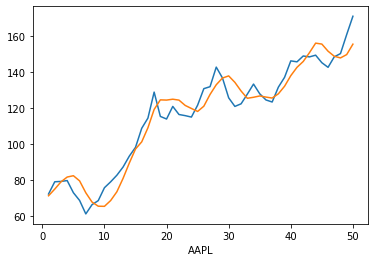

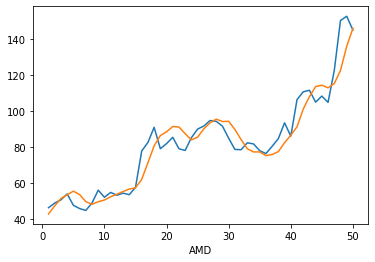

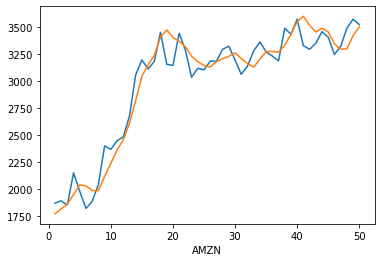

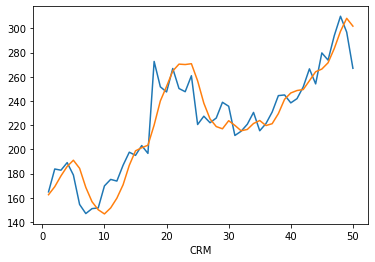

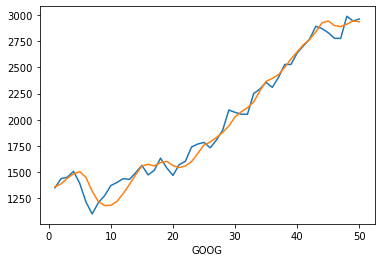

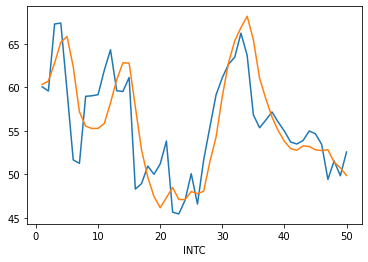

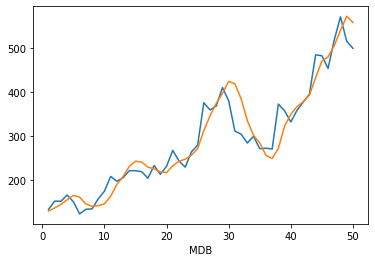

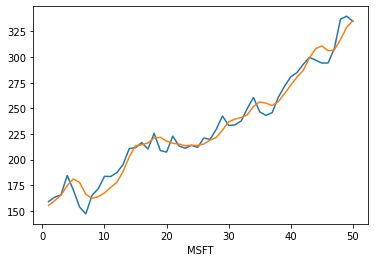

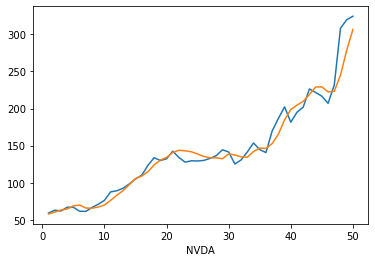

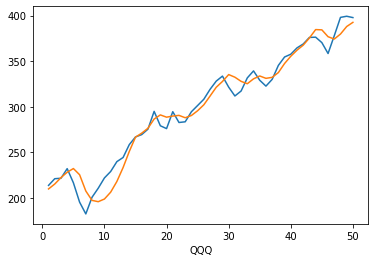

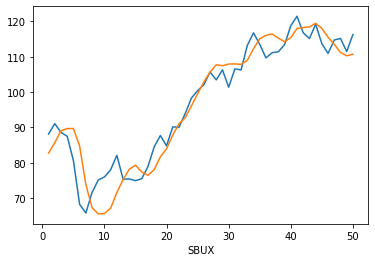

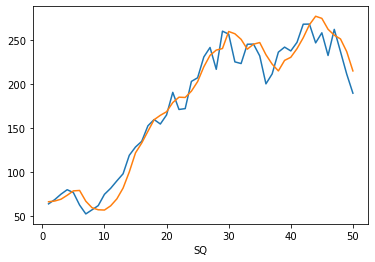

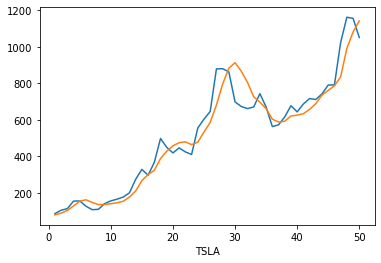

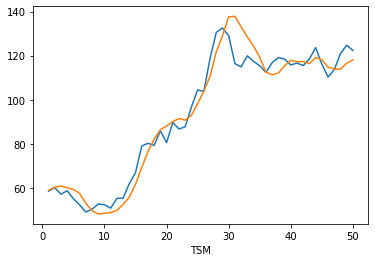

In [66]:
# plot for each stock the close price and the prediction price
# close (blue) below prediction (orange) = stock is underperforming

for i in lista:
    x = df['Index']
    y = df[str(i)]
    plt.plot(x, y)

    x = df['Index']
    y = df[str(i) + ' pred']
    plt.plot(x, y)

    plt.xlabel(i)
    plt.show()

#### At this point, the foundation is set and strategies can be created and tested.

In [67]:
# determine the weeks where pred/close is >1 and therefore they are better weeks to buy in
# steady stocks could be at about 50/50 but stocks exponentially rising could have close to 0 pred/close > 1

for j in lista:
    nlist = []
    for i in range(len(df)):
        if df[str(j) + ' pred/close'].iloc[i] >= 1:
            nlist.append(1)
        else:
            nlist.append(0)

    df[str(j) + ' >1'] = nlist

df.tail(10)

,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close,...,GOOG >1,INTC >1,MDB >1,MSFT >1,NVDA >1,QQQ >1,SBUX >1,SQ >1,TSLA >1,TSM >1
40,41,145.86,142.81,0.9791,106.19,91.10,0.8579,3327.5901,3600.00,1.0819,...,1,0,1,0,1,0,0,0,0,1
41,42,149.10,146.04,0.9795,110.55,100.92,0.9129,3293.9700,3515.99,1.0674,...,0,0,1,0,1,0,1,0,0,1
42,43,148.60,150.92,1.0156,111.40,107.84,0.9681,3349.6299,3453.72,1.0311,...,0,0,0,0,0,0,1,0,0,0
43,44,149.55,156.24,1.0448,104.80,113.45,1.0825,3457.1699,3489.95,1.0095,...,1,0,0,1,1,1,1,1,0,0
44,45,145.37,155.72,1.0712,108.16,114.21,1.0559,3405.8000,3454.83,1.0144,...,1,0,0,1,1,1,1,1,0,1
45,46,142.81,151.76,1.0627,104.68,112.75,1.0771,3246.3000,3344.41,1.0302,...,1,0,1,1,1,1,1,1,0,1
46,47,148.64,148.95,1.0021,122.36,115.12,0.9408,3320.3701,3295.07,0.9924,...,1,1,0,0,0,0,0,0,0,1
47,48,150.44,148.03,0.9840,150.16,122.43,0.8154,3488.9800,3297.11,0.9450,...,0,0,0,0,0,0,0,1,0,0
48,49,161.02,149.89,0.9309,152.52,135.77,0.8902,3572.5701,3420.14,0.9573,...,1,1,1,0,0,0,0,1,0,0
49,50,171.18,155.67,0.9094,144.85,145.78,1.0064,3523.2900,3501.97,0.9939,...,0,0,1,1,0,0,0,1,1,0


In [68]:
# square the pred/close number as a more extreme option for calculations

for j in lista:
    df[str(j) +' pred/close2'] = round(df[str(j) +' pred/close']**2,4) # make the value differences a little more pronounced

df.tail(10)

,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close,...,GOOG pred/close2,INTC pred/close2,MDB pred/close2,MSFT pred/close2,NVDA pred/close2,QQQ pred/close2,SBUX pred/close2,SQ pred/close2,TSLA pred/close2,TSM pred/close2
40,41,145.86,142.81,0.9791,106.19,91.10,0.8579,3327.5901,3600.00,1.0819,...,1.0078,0.9718,1.0488,0.9686,1.1004,0.9860,0.9440,0.9428,0.8512,1.0108
41,42,149.10,146.04,0.9795,110.55,100.92,0.9129,3293.9700,3515.99,1.0674,...,0.9978,0.9734,1.0036,0.9608,1.0785,0.9932,1.0254,0.8881,0.8418,1.0318
42,43,148.60,150.92,1.0156,111.40,107.84,0.9681,3349.6299,3453.72,1.0311,...,0.9631,0.9773,0.9904,0.9968,0.9345,0.9970,1.0580,0.9946,0.9362,0.9649
43,44,149.55,156.24,1.0448,104.80,113.45,1.0825,3457.1699,3489.95,1.0095,...,1.0392,0.9364,0.7974,1.0764,1.0685,1.0447,1.0046,1.2602,0.9817,0.9279
44,45,145.37,155.72,1.0712,108.16,114.21,1.0559,3405.8000,3454.83,1.0144,...,1.0808,0.9339,0.9493,1.1164,1.1194,1.0770,1.0777,1.1310,0.9272,1.0347
45,46,142.81,151.76,1.0627,104.68,112.75,1.0771,3246.3000,3344.41,1.0302,...,1.0891,0.9738,1.1185,1.0824,1.1548,1.1057,1.0839,1.2728,0.9870,1.0833
46,47,148.64,148.95,1.0021,122.36,115.12,0.9408,3320.3701,3295.07,0.9924,...,1.0833,1.1434,0.9510,0.9922,0.9279,0.9807,0.9787,0.9504,0.6652,1.0052
47,48,150.44,148.03,0.9840,150.16,122.43,0.8154,3488.9800,3297.11,0.9450,...,0.9500,0.9946,0.8957,0.8853,0.6328,0.9101,0.9328,1.1249,0.7276,0.8864
48,49,161.02,149.89,0.9309,152.52,135.77,0.8902,3572.5701,3420.14,0.9573,...,1.0008,1.0373,1.2323,0.9378,0.7590,0.9442,0.9785,1.2557,0.8746,0.8735
49,50,171.18,155.67,0.9094,144.85,145.78,1.0064,3523.2900,3501.97,0.9939,...,0.9823,0.9000,1.2490,1.0040,0.8934,0.9738,0.9065,1.2848,1.1809,0.9306


In [69]:
# Create all of the strategies to test 

for j in lista:
    
# baseline - buy in $10 bi-weekly no matter what - baseline
    df[str(j) +' baseline'] = 0
    df[str(j) +' baseline_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' baseline'].iloc[i] = biwkly_contrib
        df[str(j) +' baseline_stk'].iloc[i] = round(df[str(j) +' baseline'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib
        if v < biwkly_contrib:
            break

# opt1 - buy in every other week but proportionally to the pred/close
    df[str(j) +' opt1'] = 0
    df[str(j) +' opt1_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt1'].iloc[i] = biwkly_contrib*df[str(j) +' pred/close'].iloc[i]
        df[str(j) +' opt1_stk'].iloc[i] = round(df[str(j) +' opt1'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*df[str(j) +' pred/close'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*df[str(j) +' pred/close'].iloc[t]:
            break

# opt2 - buy in every other week but proportionally to the square of pred/close
    df[str(j) +' opt2'] = 0
    df[str(j) +' opt2_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt2'].iloc[i] = biwkly_contrib*df[str(j) +' pred/close2'].iloc[i]
        df[str(j) +' opt2_stk'].iloc[i] = round(df[str(j) +' opt2'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*df[str(j) +' pred/close2'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*df[str(j) +' pred/close2'].iloc[t]:
            break

# opt3 - buy in every other week. 0 on days <1 and twice the normal bi-weekly contribution on days >= 1
    df[str(j) +' opt3'] = 0
    df[str(j) +' opt3_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt3'].iloc[i] = biwkly_contrib*2*df[str(j) +' >1'].iloc[i] 
        df[str(j) +' opt3_stk'].iloc[i] = round(df[str(j) +' opt3'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*2*df[str(j) +' >1'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*2*df[str(j) +' >1'].iloc[t]:
            break

# opt4 - buy in every other week but proportionally to the inverse of pred/close
# This is more of a validation and will ideally return negative compared to baseline
    df[str(j) +' opt4'] = 0
    df[str(j) +' opt4_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt4'].iloc[i] = round(biwkly_contrib/df[str(j) +' pred/close'].iloc[i],4)
        df[str(j) +' opt4_stk'].iloc[i] = round(df[str(j) +' opt4'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib/df[str(j) +' pred/close'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib/df[str(j) +' pred/close'].iloc[t]:
            break

df.tail(10)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close,...,TSM baseline,TSM baseline_stk,TSM opt1,TSM opt1_stk,TSM opt2,TSM opt2_stk,TSM opt3,TSM opt3_stk,TSM opt4,TSM opt4_stk
40,41,145.86,142.81,0.9791,106.19,91.10,0.8579,3327.5901,3600.00,1.0819,...,10,0.0857,10.054,0.0862,10.108,0.0867,20,0.1715,9.9463,0.0853
41,42,149.10,146.04,0.9795,110.55,100.92,0.9129,3293.9700,3515.99,1.0674,...,10,0.0866,10.158,0.0879,10.318,0.0893,20,0.1732,9.8445,0.0852
42,43,148.60,150.92,1.0156,111.40,107.84,0.9681,3349.6299,3453.72,1.0311,...,10,0.0844,9.823,0.0829,9.649,0.0814,0,0.0000,10.1802,0.0859
43,44,149.55,156.24,1.0448,104.80,113.45,1.0825,3457.1699,3489.95,1.0095,...,10,0.0809,9.633,0.0779,9.279,0.0751,0,0.0000,10.3810,0.0840
44,45,145.37,155.72,1.0712,108.16,114.21,1.0559,3405.8000,3454.83,1.0144,...,10,0.0861,10.172,0.0876,10.347,0.0891,20,0.1722,9.8309,0.0846
45,46,142.81,151.76,1.0627,104.68,112.75,1.0771,3246.3000,3344.41,1.0302,...,10,0.0907,10.408,0.0944,10.833,0.0982,0,0.0000,9.6080,0.0871
46,47,148.64,148.95,1.0021,122.36,115.12,0.9408,3320.3701,3295.07,0.9924,...,10,0.0880,10.026,0.0882,10.052,0.0885,0,0.0000,9.9741,0.0878
47,48,150.44,148.03,0.9840,150.16,122.43,0.8154,3488.9800,3297.11,0.9450,...,10,0.0827,9.415,0.0779,8.864,0.0733,0,0.0000,10.6213,0.0878
48,49,161.02,149.89,0.9309,152.52,135.77,0.8902,3572.5701,3420.14,0.9573,...,10,0.0802,9.346,0.0749,8.735,0.0700,0,0.0000,10.6998,0.0858
49,50,171.18,155.67,0.9094,144.85,145.78,1.0064,3523.2900,3501.97,0.9939,...,10,0.0818,9.647,0.0789,0.000,0.0000,0,0.0000,0.0000,0.0000


In [70]:
print('baseline - contribute 10 every other week')
print('opt1 - buy in every other week proportional to the pred/close variable')
print('opt2 - buy in every other week proportional to the square of pred/close variable')
print('opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1')
print('opt4 - buy in every other week inversely proportional to the pred/close variable')

df_bought_in = pd.DataFrame()
df_profit = pd.DataFrame()
df_diff = pd.DataFrame()

for j in lista:
    d = {'name': [str(j) +' baseline', str(j) +' op1', str(j) +' op2', str(j) +' op3', str(j) +' op4']
         ,'bought_in': [
             round(sum(df[str(j) +' baseline']),2),
             round(sum(df[str(j) +' opt1']),2), 
             round(sum(df[str(j) +' opt2']),2), 
             round(sum(df[str(j) +' opt3']),2),
             round(sum(df[str(j) +' opt4']),2)]
         ,'stocks_held': [
             round(sum(df[str(j) +' baseline_stk']),4), 
             round(sum(df[str(j) +' opt1_stk']),4), 
             round(sum(df[str(j) +' opt2_stk']),4), 
             round(sum(df[str(j) +' opt3_stk']),4), 
             round(sum(df[str(j) +' opt4_stk']),4)]
#          ,'cost_per_stock': [
#              sum(df[str(j) +' baseline'])/sum(df[str(j) +' baseline_stk']), 
#              sum(df[str(j) +' opt1'])/sum(df[str(j) +' opt1_stk']), 
#              sum(df[str(j) +' opt2'])/sum(df[str(j) +' opt2_stk']), 
#              sum(df[str(j) +' opt3'])/sum(df[str(j) +' opt3_stk']), 
#             sum(df[str(j) +' opt4'])/sum(df[str(j) +' opt4_stk'])]
         ,'profit': [
             round((sum(df[str(j) +' baseline_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' baseline']),2),
             round((sum(df[str(j) +' opt1_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt1']),2), 
             round((sum(df[str(j) +' opt2_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt2']),2), 
             round((sum(df[str(j) +' opt3_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt3']),2), 
             round((sum(df[str(j) +' opt4_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt4']),2)]
        }

    df2 = pd.DataFrame(data=d)

    df2['diff'] = 0
    df2['diff'].iloc[1] = round(df2['profit'].iloc[1]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[2] = round(df2['profit'].iloc[2]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[3] = round(df2['profit'].iloc[3]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[4] = round(df2['profit'].iloc[4]-df2['profit'].iloc[0],2)

    df2['%_diff'] = round((df2['diff']/df2['profit'])*100,2)

    print('')
    print(df2)
    
    df_bought_in[str(j) + ' bought_in'] = df2['bought_in']
    df_profit[str(j) + ' profit'] = df2['profit']
    df_diff[str(j) + ' diff'] = df2['diff']

baseline - contribute 10 every other week
opt1 - buy in every other week proportional to the pred/close variable
opt2 - buy in every other week proportional to the square of pred/close variable
opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1
opt4 - buy in every other week inversely proportional to the pred/close variable

            name  bought_in  stocks_held  profit   diff  %_diff
0  AAPL baseline     500.00       4.6230  291.37   0.00    0.00
1       AAPL op1     499.52       4.6327  293.51   2.14    0.73
2       AAPL op2     493.24       4.6234  298.19   6.82    2.29
3       AAPL op3     420.00       3.9621  258.23 -33.14  -12.83
4       AAPL op4     491.92       4.5752  291.26  -0.11   -0.04

           name  bought_in  stocks_held  profit   diff  %_diff
0  AMD baseline     500.00       6.7771  481.66   0.00    0.00
1       AMD op1     497.91       6.8027  487.47   5.81    1.19
2       AMD op2     499.72       6.8799  496.83  15.17 

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [71]:
# how much was ivested
# no amount should be above the previously set 'invest' amount
# row 0 = baselines. Rows 1-4 = options 1-4
df_bought_in

,AAPL bought_in,AMD bought_in,AMZN bought_in,CRM bought_in,GOOG bought_in,INTC bought_in,MDB bought_in,MSFT bought_in,NVDA bought_in,QQQ bought_in,SBUX bought_in,SQ bought_in,TSLA bought_in,TSM bought_in
0,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
1,499.52,497.91,499.28,498.74,490.34,492.10,492.41,499.57,495.60,499.29,498.71,490.27,490.70,499.37
2,493.24,499.72,499.65,487.35,492.43,496.77,489.25,490.13,493.70,499.72,499.54,496.35,491.70,491.52
3,420.00,440.00,500.00,420.00,480.00,460.00,480.00,420.00,460.00,380.00,500.00,440.00,320.00,500.00
4,491.92,496.20,491.77,495.07,491.36,490.32,494.14,491.44,496.49,491.67,492.88,495.72,499.46,492.32


In [72]:
# profits made above/below the investment
# row 0 = baselines. Rows 1-4 = options 1-4
df_profit

,AAPL profit,AMD profit,AMZN profit,CRM profit,GOOG profit,INTC profit,MDB profit,MSFT profit,NVDA profit,QQQ profit,SBUX profit,SQ profit,TSLA profit,TSM profit
0,291.37,481.66,114.11,118.59,319.23,-23.42,509.59,258.93,887.78,195.69,116.99,195.44,1212.77,231.96
1,293.51,487.47,114.83,119.18,320.60,-22.61,517.48,260.00,886.35,196.19,117.00,193.25,1209.87,230.43
2,298.19,496.83,114.46,120.75,323.54,-21.88,533.28,262.24,888.40,197.64,118.03,197.41,1243.69,229.97
3,258.23,455.14,109.53,105.60,288.01,-15.23,507.24,218.19,795.15,162.16,108.26,179.72,744.16,234.94
4,291.26,479.44,115.29,118.71,318.99,-24.29,509.00,258.55,892.88,195.86,118.02,203.89,1248.76,234.51


In [73]:
# profits made above/below the baseline profits
# row 0 = baselines. Rows 1-4 = options 1-4
df_diff

,AAPL diff,AMD diff,AMZN diff,CRM diff,GOOG diff,INTC diff,MDB diff,MSFT diff,NVDA diff,QQQ diff,SBUX diff,SQ diff,TSLA diff,TSM diff
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2.14,5.81,0.72,0.59,1.37,0.81,7.89,1.07,-1.43,0.50,0.01,-2.19,-2.90,-1.53
2,6.82,15.17,0.35,2.16,4.31,1.54,23.69,3.31,0.62,1.95,1.04,1.97,30.92,-1.99
3,-33.14,-26.52,-4.58,-12.99,-31.22,8.19,-2.35,-40.74,-92.63,-33.53,-8.73,-15.72,-468.61,2.98
4,-0.11,-2.22,1.18,0.12,-0.24,-0.87,-0.59,-0.38,5.10,0.17,1.03,8.45,35.99,2.55


In [74]:
# Final summary calculations
# if you take chosen stocks and apply chosen investment strategies over the course of 2 years, 
# investing bi-weekly, you get these results:

print('Current date/time: ', datetime.datetime.now().strftime("%B %d, %Y %H:%M:%S"))
print('')

print('baseline - contribute 10 every other week')
print('opt1 - buy in every other week proportional to the pred/close variable')
print('opt2 - buy in every other week proportional to the square of pred/close variable')
print('opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1')
print('opt4 - buy in every other week inversely proportional to the pred/close variable')
print('')

print(round(sum(df_diff.iloc[1]),2), 'opt1 profit/loss over baseline.', 
      round(sum(df_profit.iloc[1]),2), 'core profit on', round(sum(df_bought_in.iloc[1]),2), 'investment.',
      round((sum(df_diff.iloc[1])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[2]),2), 'opt2 profit/loss over baseline.', 
      round(sum(df_profit.iloc[2]),2), 'core profit on', round(sum(df_bought_in.iloc[2]),2), 'investment.',
      round((sum(df_diff.iloc[2])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[3]),2), 'opt3 profit/loss over baseline.', 
      round(sum(df_profit.iloc[3]),2), 'core profit on', round(sum(df_bought_in.iloc[3]),2), 'investment.',
      round((sum(df_diff.iloc[3])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[4]),2), 'opt4 profit/loss over baseline.', 
      round(sum(df_profit.iloc[4]),2), 'core profit on', round(sum(df_bought_in.iloc[4]),2), 'investment.',
      round((sum(df_diff.iloc[4])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')

Current date/time:  December 07, 2021 17:39:21

baseline - contribute 10 every other week
opt1 - buy in every other week proportional to the pred/close variable
opt2 - buy in every other week proportional to the square of pred/close variable
opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1
opt4 - buy in every other week inversely proportional to the pred/close variable

12.86 opt1 profit/loss over baseline. 4923.55 core profit on 6943.81 investment. 0.26 percent above/below baseline profit.
91.86 opt2 profit/loss over baseline. 5002.55 core profit on 6921.07 investment. 1.87 percent above/below baseline profit.
-759.59 opt3 profit/loss over baseline. 4151.1 core profit on 6220.0 investment. -15.47 percent above/below baseline profit.
50.18 opt4 profit/loss over baseline. 4960.87 core profit on 6910.76 investment. 1.02 percent above/below baseline profit.


In [75]:
print("Using one of the strategies, today's buy in values are listed.")

now = pd.DataFrame()
opts = ['opt1', 'opt2', 'opt3', 'opt4']
now['method'] = opts

for j in lista:
    nlist = []
    for i in range(1, len(opts)+1):
        if i == 1: 
            x = biwkly_contrib * df[str(j) + ' pred/close'].iloc[49]
        elif i == 2:
            x = biwkly_contrib * df[str(j) + ' pred/close2'].iloc[49]
        elif i == 3:
            x = biwkly_contrib * 2 * df[str(j) + ' >1'].iloc[49]
        elif i == 4: 
            x = biwkly_contrib / df[str(j) + ' pred/close'].iloc[49]
        else: -1
        nlist.append(round(x,2))
    now[str(j)] = nlist

now

Using one of the strategies, today's buy in values are listed.


,method,AAPL,AMD,AMZN,CRM,GOOG,INTC,MDB,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM
0,opt1,9.09,10.06,9.94,11.30,9.91,9.49,11.18,10.02,9.45,9.87,9.52,11.34,10.87,9.65
1,opt2,8.27,10.13,9.88,12.78,9.82,9.00,12.49,10.04,8.93,9.74,9.06,12.85,11.81,9.31
2,opt3,0.00,20.00,0.00,20.00,0.00,0.00,20.00,20.00,0.00,0.00,0.00,20.00,20.00,0.00
3,opt4,11.00,9.94,10.06,8.85,10.09,10.54,8.95,9.98,10.58,10.13,10.50,8.82,9.20,10.37


#### Final notes

Stocks going up parabolically will almost never be above 1, so I can't simply not buy in when pred/close is not above 1. GOOG is like this as of 9/3/2021. This kind of stock will also produce worse than baseline profits for opt1 and opt2 because they won't be investing the full 500 over the course of the investment period. Option 3 is not viable.

Stocks in a big S-curve, flat ~ rise ~ flat, will only have a pred/close above 1 on the latter half of the year, so again, I can't contribute nothing. TSM and TSLA are like this as of 9/3/2021. Option 3 is not viable.

Options 1 and 2 seem to do well on stocks with lots of variation but loses on stocks seeing exponential growth. Missing out on a stock growing exponentially will surely wipe out all gains seen elsewhere. There may be some merit to opt4, the inverse method, but the baseline probably remains the best method if a single method is picked, and based only on daily closing values, for across the board investing.